# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import warnings
import seaborn as sb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

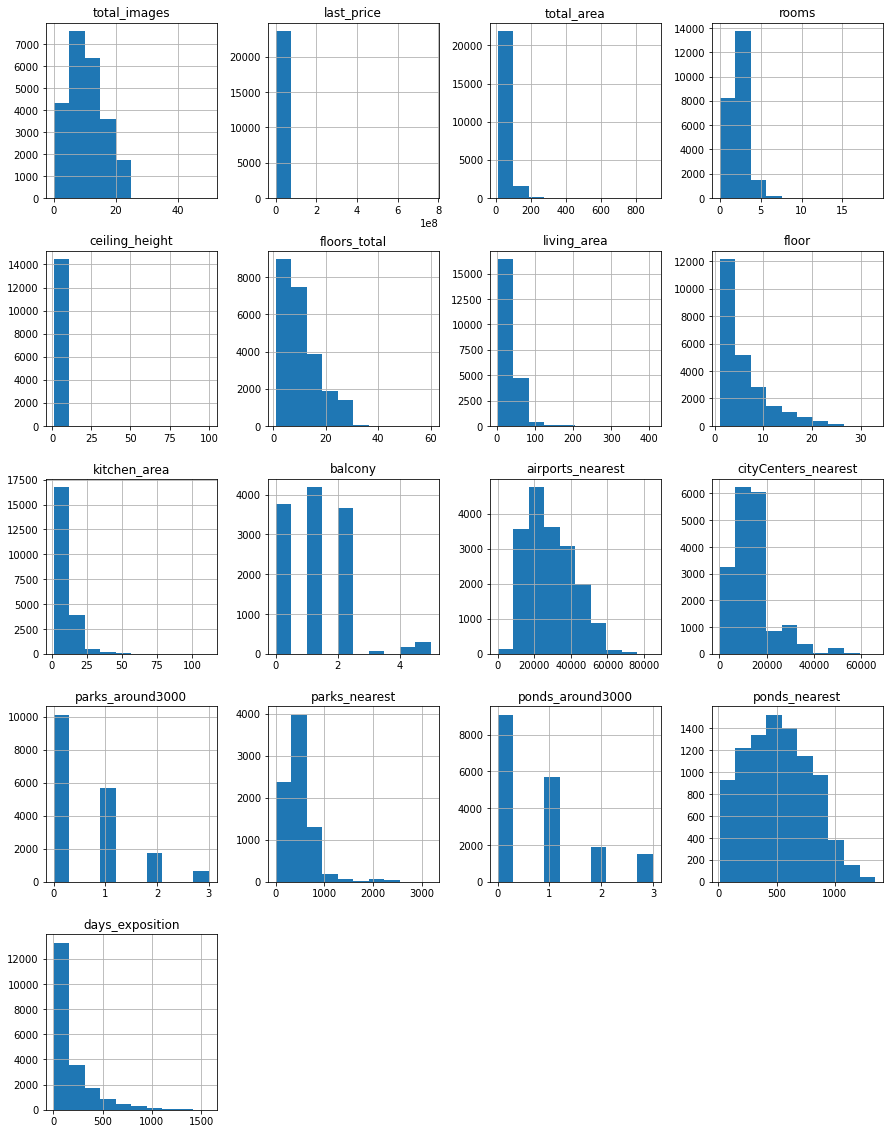

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head(10))
df.info()
pd.set_option('display.max_columns', None)
df.hist(figsize=(15,20));

### Предобработка данных

#### Пропущенные значения


In [3]:
df.isna().sum() #находим количство пропущеных значенией в каждом столбце,
#и хоть эти данные есть после вызова информации о датасете, нагляднее видеть именно количество пропусков
# начинаем поочереди обрабатывать значения в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [4]:
#df['ceiling_height'].isna().sum()
#чтобы заполнить пропуски в высоте потолков найдем медианное значение
#df['ceiling_height'].median()
#заполним пропуски медианными значениями
df['ceiling_height'] = df['ceiling_height'].fillna(2.65)
#проверим количество пропусков
df['ceiling_height'].isna().sum()


0

In [5]:
#чтобы разобраться со строками с пропущени=ыми значениями с всего жтажей посмотрим на эти данные. 
#Для этого заменим пропуски на ноль и сделаем срез по этим строкам
df['floors_total'] = df['floors_total'].fillna(0)
df.query('floors_total == 0')
#никаких закономерностей по пропускам нет, значит оставим нулевые значения, но заменим тип данных на int, 
#пропущенных значений всего 86 строки с этими данными можн о и удалить.
df['floors_total'] = df['floors_total'].astype(int)


In [6]:
# заполним пропуски данных о количестве балконов нулевыми данными так как вероятно,
#что в большей степени причиной возникновение пропусков является не заполнение этих данных продавцом
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

In [7]:
#заменим все пропуски данных о количестве прудов и парков в радиусе 3000 м, нулями, так эти данные заполняются автоматически то вероятнее всего
#это програмный сбой или в указанном радиусе нет прудов и парков
df[['parks_around3000', 'ponds_around3000']] = df[['parks_around3000', 'ponds_around3000']].fillna(0)
df[['parks_around3000', 'ponds_around3000']].isna().sum()

parks_around3000    0
ponds_around3000    0
dtype: int64

In [8]:
#пропуски значений в столбце is_apatment логично заменить на False, а затем заменить тип данных на bool, в описании данных
# указано что в данном столбце хранятся булевы значения. По информации о датасете в данном стобце используется тип данных
# object
df['is_apartment'] = df['is_apartment'].fillna(False).astype(bool)
df['is_apartment'].isna().sum()


0

In [9]:
# попробуем найти закономерности в пропусках занчений площади кужни и жилой площади, возможно при продаже квартир-студий 
#продавцы не указывали эти данные
# сделаем срез по квартирам студиям
df.query('studio == True')['kitchen_area'].isna().sum()
#df.query('studio == True').info()
# делаем вывод что для типа квартир студия площад кухни не указано совсем. 
#Согласно строительным нормам и правилам (СНиП), площадь комнаты в однокомнатной квартире должна
#быть не менее 14 квадратных метров, а кухни, по самым «мягким» правилам, — 5 квадратных метров
#заменим пустые значения площади кухни для студий на минимально разрешенное.
df.loc[(df['studio']==True, 'kitchen_area')] = 5


In [10]:
#посмотри в каких случаях еще не указана площадь кухни
df[df['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.65,9,NaN,2,False,False,False,NaN,0.0,Коммунар,NaN,NaN,0.0,NaN,0.0,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5,NaN,1,False,False,False,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,0.0,NaN,0.0,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.65,22,NaN,3,False,False,False,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.65,13,NaN,13,False,False,False,NaN,0.0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18,19.6,10,False,False,False,NaN,0.0,Никольское,NaN,NaN,0.0,NaN,0.0,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10,NaN,1,False,False,False,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9,NaN,2,False,False,False,NaN,0.0,поселок городского типа Синявино,NaN,NaN,0.0,NaN,0.0,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,2.65,9,NaN,4,False,False,False,NaN,0.0,Сосновый Бор,NaN,NaN,0.0,NaN,0.0,NaN,45.0


<AxesSubplot:xlabel='rooms', ylabel='kitchen_area'>

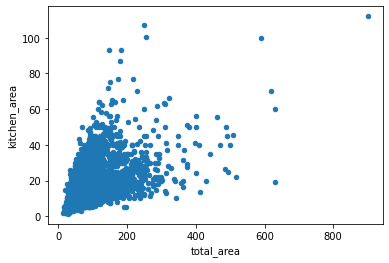

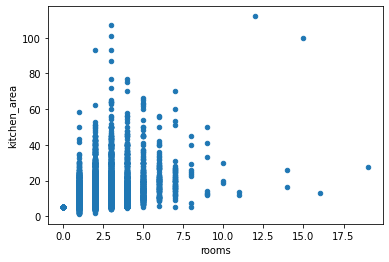

In [11]:
#чтобы правильнее заполнить пропуски данных по площади кухни высним есть ли зависимость площади кухни от общей площади
#для этого построим диаграмму рассеяния
df.plot(kind='scatter', x='total_area', y='kitchen_area')
# прямой и очевидной зависимости нет, проверим зависимость от количества комнат
df.plot(kind='scatter', x='rooms', y='kitchen_area')
#так же прямой зависимоти нет, поэтому оставшиеся пропуски 


In [12]:
#так же прямой зависимоти нет, поэтому оставшиеся пропуски заменим медианными значениями
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())


In [13]:
df.loc[df['kitchen_area'] > df['total_area']].count()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [14]:
#пропущенных значений в столбце с названием населенного пункта всего 49 можно удалить данные строки, 
#так как их значения не повлияют на показатели, а заполнить населеные пункты не представляется возможным
df = df.dropna(subset=['locality_name'])

30.0

0.5769230769230769

30.0

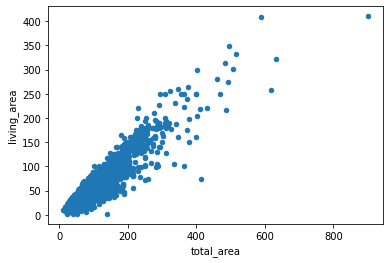

In [15]:
warnings.simplefilter("ignore")
#если размер кухни не значительно зависил от общей площади, то размер жилой площади от нее очень зависит, посторим диаграмму
df.plot(kind='scatter', x='total_area', y='living_area')
#я вная зависимость чем выше общая площадь тем больше жилая площадь.
#найдем численную составляющую зависимости и заполним в соответсвии ей
display(df['living_area'].median())
total_living_area = df['living_area'].median()/df['total_area'].median()
display(total_living_area)
df['living_area'] = df['living_area'].fillna(df['total_area'] * 0.57)
df.head()
#проверим изменение медианы жилой площади, она не изменилась
display(df['living_area'].median())

In [16]:
#осталось проверить пропуски в значениях расстояний. Поищем закономерности в пропусках расстояний:
#выведем строки с пустыми значениями по колонкам airports_nearest и cityCenters_nearest так как 
#в них количество пропусков примерно одинаковое и проверим гипотезу что значения не указаны для населенных пунктов за чертой
# города
df[df['airports_nearest'].isna()]['locality_name'].unique()
df[df['cityCenters_nearest'].isna()]['locality_name'].unique()
#Санкт-Петербург присутствует во всех списках, полностью гипотеза не подтвердилась, однако большое количество уникальных значений
#позволяет сделать вывод что частично гипотеза верна



array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

*Пропущенные значения расстояний заменять на 0 нельзя, так как тогда это будет означать что объект находится непосредственно в центре, аэропорте, парке или пруду. Заменять на медианные тоже неправильно, так как это может в дальнейшем исказить выводы. Оставим данные пропуски без изменений и в дальнейшем при группировке по нас пунктам при необходимости мы заполним пропуски данных значений*




Итак мы проверили дата сет на пропущенные значения, исходя из того что в таблице есть 2 типа данных- заполняемые пользователем и заполняемые автоматически на основании картографических данных, источника пропусков соотвектсвенно два - человеческий фактор и программные ошибки. Пользователь в свою очередь может намеренно не указать некоторые данные (как в случае с балконами: нет балконов- нет данных) или по не знанию не заполнить (как в случае со студиями)


#### Замена типов данных


In [17]:

# при заполнении пропуском мы уже изменили тип данных в столбце is_apartment на основании описания к датасету
# остались изменить тип данных а first_day_exposition, и перевести его в формат даты, и balcony, который необходимо перевести
# в целые числа, 
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')
df['balcony'] = df['balcony'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

*Мы заменили тип данных в трех столбцах:*
1. is_apartment на булево значение, это было в пояснении к датасету, и логично было заполнить этот столбец именно таким типом данных, объект либо является аппартаментами (True) либо нет (False)
2. balcony заменили на цельночисленные значения, ведь не может быть 1,5 балкона
3. first_day_exposition заменили на тип данных datetime для дальнейшей работы с датой

#### Исправление неявных дубликатов


In [18]:
#найдем все уникальные значения в столбце locality_name и посчитаем их количество
#display(df['locality_name'].value_counts())
df['locality_name'].nunique()
#количество уникальных значений 364
#df['locality_name'].unique()

# напишем функцию заменяющая ё на е, применим ее
def del_duplicates(locality_name):
    if 'ё' in locality_name:
        return locality_name.replace('ё', 'е')
    else:
        return locality_name


# функция заменяющая ё на е, применим ее



In [19]:
# применили функцию, передали значния вновьсозданного столбца исходному, и удалили ненужный теперь столбец.
df['locality_name_renamed'] = df['locality_name'].apply(del_duplicates) 
#передали значния вновьсозданного столбца исходному,
df['locality_name'] = df['locality_name_renamed']
#и удалили ненужный теперь столбец.
df = df.drop(columns = ['locality_name_renamed'], axis=1)
# проверили количество уникальных значений. Было 364 стало 330. 
df['locality_name'].nunique()

330

#### Исправление артефактных значений


2.724310782241014

22869    100.0
3148      32.0
22336     32.0
21377     27.5
17857     27.0
5246      27.0
20478     27.0
21824     27.0
10773     27.0
4876      27.0
5807      27.0
22938     27.0
5669      26.0
11285     25.0
6246      25.0
9379      25.0
355       25.0
18545     25.0
4643      25.0
14382     25.0
5076      24.0
20507     22.6
17496     20.0
15061     14.0
22309     10.3
5863       8.3
17442      8.0
3474       8.0
15743      8.0
20264      6.0
Name: ceiling_height, dtype: float64

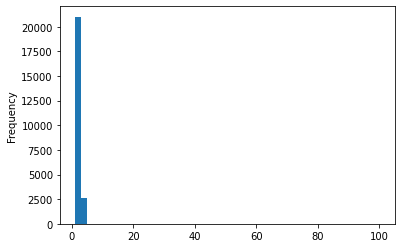

In [20]:
df['ceiling_height'].plot(y = 'ceiling_height', kind = 'hist', bins = 50)
display(df['ceiling_height'].mean())
df['ceiling_height'].median()
df['ceiling_height'].sort_values(ascending=False).head(30)
# видим что есть значения не овечающие реальности и если природу значений от 8 до 22.6 метров нам не выяснить, то значения 
#от 25 до 32 возможно являются от 2,5 до 3,2

<AxesSubplot:ylabel='Frequency'>

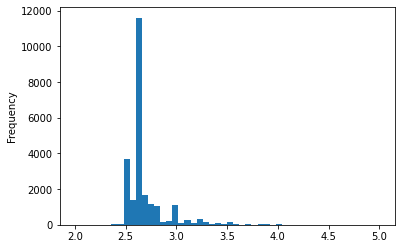

In [21]:
df.loc[df['ceiling_height'] > 23, 'ceiling_height'] = df.loc[df['ceiling_height'] > 23, 'ceiling_height']/10
df['ceiling_height'].sort_values(ascending=False).head(30)
#значения выше 5м заменим на медианное
df.loc[df['ceiling_height'] >=5 , 'ceiling_height'] = df['ceiling_height'].median()
# построим гистограмму по обновленным данным
df['ceiling_height'].plot(y = 'ceiling_height', kind = 'hist', bins = 50, range=(2,5))

In [22]:
# в столбце со значениями жилой площади есть нереально низкие значения при нормальных показателях общей площади.
# заменим значения жилой площади меньше 5м кв на соотношение медианной жилой площади к медианной общей
df.loc[df['living_area'] < 5, 'living_area'] = df.loc[df['living_area'] < 5, 'total_area'] * 0.57
df.loc[df['living_area'] < 5]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14498,6,32250000.0,374.6,2018-06-09,19,2.65,5,264.5,2,False,False,False,27.6,0,Санкт-Петербург,19497.0,3574.0,0.0,NaN,2.0,548.0,114.0
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4,180.0,4,False,False,False,13.0,1,Санкт-Петербург,23575.0,4142.0,1.0,516.0,0.0,NaN,1365.0
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6,409.0,3,False,False,False,100.0,0,Санкт-Петербург,24447.0,4666.0,1.0,767.0,0.0,NaN,14.0
866,5,25000000.0,363.0,2017-12-23,14,3.16,5,222.0,4,False,False,False,16.6,0,Санкт-Петербург,38076.0,7950.0,0.0,NaN,2.0,435.0,418.0
20829,6,28659000.0,245.4,2016-03-31,14,2.65,4,168.3,2,False,False,False,25.9,0,Санкт-Петербург,21104.0,2054.0,3.0,541.0,2.0,118.0,95.0
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25,409.7,25,False,False,False,112.0,0,Санкт-Петербург,30706.0,7877.0,0.0,NaN,2.0,318.0,106.0
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5,129.0,2,False,False,False,11.9,0,Санкт-Петербург,21469.0,1015.0,1.0,686.0,2.0,66.0,813.0
648,3,17500000.0,183.7,2018-07-01,11,3.40,7,138.8,7,False,False,False,13.3,0,Санкт-Петербург,23606.0,3148.0,0.0,NaN,0.0,NaN,NaN
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6,189.4,6,False,False,False,30.0,1,Санкт-Петербург,26229.0,4932.0,3.0,316.0,1.0,227.0,77.0
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7,145.9,7,False,False,False,18.8,1,Санкт-Петербург,10726.0,12169.0,1.0,191.0,1.0,531.0,NaN


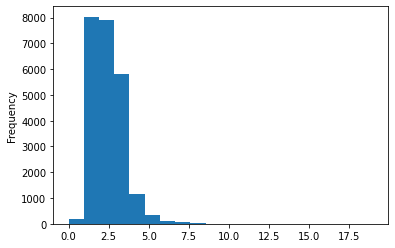

In [23]:
# изучим артефактные значения в других столбцах с числовыми данными: количество комнат, общая площад, стоимость квартиры
df['rooms'].plot(y = 'rooms', kind = 'hist', bins = 20)
df['rooms'].describe()
#Максимальное количество комнат 19, а вдруг это бывшие царские покои? проверим есть ли значения меньше,
#отосртируем данные по количеству комнат и выведем на экран первые 10 строк
df.sort_values(by = 'rooms', ascending = False).head(10)



*Исходя из данных можно сделать вывод что 19 комнат вполне реальное значене, как и 16,15 и 10. Общие и жилые пложади примерно
соответсвуют количеству жилых комнат. Например в 19ти комнатной квартире общая площадь 374 кв м а жилая 264, 
на 19 комнат это в среднем по 13 кв метров на жилую комнату, хороший показатель. Однако нашему исследованию такие выбивающиеся значения будут мешать, удалим строки с количеством комнат более 7*

In [24]:

df = df.loc[df['rooms']<7]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
14706,15,401300000.0,401.0,2016-02-20,5,2.65,9,204.00,9,False,False,False,24.00,3,Санкт-Петербург,21912.0,2389.0,1.0,545.0,1.0,478.0,393.0
1436,19,330000000.0,190.0,2018-04-04,3,3.50,7,95.00,5,False,False,False,40.00,0,Санкт-Петербург,23011.0,1197.0,3.0,519.0,3.0,285.0,233.0
22831,18,289238400.0,187.5,2019-03-19,2,3.37,6,63.70,6,False,False,False,30.20,0,Санкт-Петербург,22494.0,1073.0,3.0,386.0,3.0,188.0,NaN
16461,17,245000000.0,285.7,2017-04-10,6,3.35,7,182.80,4,False,False,False,29.80,0,Санкт-Петербург,33143.0,6235.0,3.0,400.0,3.0,140.0,249.0
13749,7,240000000.0,410.0,2017-04-01,6,3.40,7,218.00,7,False,False,False,40.00,0,Санкт-Петербург,32440.0,5297.0,0.0,NaN,2.0,198.0,199.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17676,0,450000.0,36.5,2018-02-01,1,2.65,5,17.30,4,False,False,False,8.50,1,деревня Ям-Тесово,NaN,NaN,0.0,NaN,0.0,NaN,120.0
16274,18,440000.0,40.0,2018-07-10,1,2.65,5,22.80,1,False,False,False,9.01,0,деревня Старополье,NaN,NaN,0.0,NaN,0.0,NaN,45.0
17456,7,430000.0,30.4,2019-04-22,1,2.65,2,16.00,1,False,False,False,6.00,0,Сланцы,NaN,NaN,0.0,NaN,0.0,NaN,NaN
14911,5,430000.0,54.0,2018-06-26,2,2.65,3,30.78,3,False,False,False,9.01,0,поселок станции Свирь,NaN,NaN,0.0,NaN,0.0,NaN,44.0


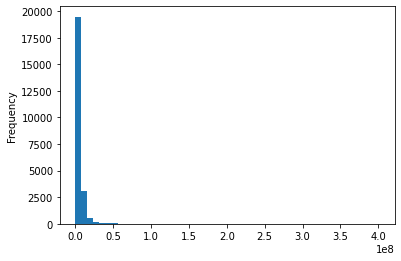

In [25]:
df['last_price'].plot(y = 'last_price', kind = 'hist', bins = 50)
df.sort_values(by='last_price', ascending=False)


In [26]:
df['last_price'] = df['last_price']/1000000

*интересная особенность, 3 самые дорогие квартиры - на последнем этаже с большой пложадью, скорее всего это пентхаусы, поэтому и цена вполне обоснована и не кажется такой высокой, эти квартиры всегда высоко ценились. К тому же случаи продаж квртир стоимостью более 100 млн не еденичны, их нельзя считать артефактами, скорее еще одна причина использовать медиану в расчетах.
А вот самое нижнее значение всего 12,19 тыс рублей, еще и не далеко от центра с общей площадью 109 кв метров. более подходящая цена 12 млн. умножим данное значение на 1000 чтобы привести к реальности*

In [27]:
#удалим слишком высокие значения стоимости квартиры так как их количество слишком мало для статистики 
#но сильно влияет на средний показатель
df = df.loc[df['last_price'] < 45000000]

In [28]:
df.loc[8793, 'last_price'] = df.loc[8793, 'last_price']*1000
df.loc[8793, 'last_price']
#12 млн 190 тыс -вполне адекватная цена на квартиру

12.19

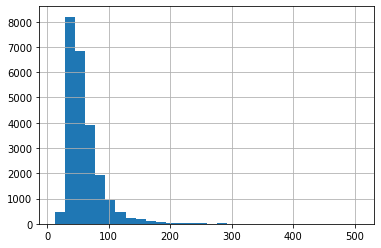

In [29]:
#код ревьюера
df['total_area'].hist(bins=30);

In [30]:
#отбросим квартиры с общей площадью более 300 м кв
df = df.loc[df['total_area'] < 300]

In [31]:
df.shape[0]

23525

*До удаления выбивающихся значений общей площади, количества комнат и цены, количество строк сотсавляло 23699, после - 23453
удалили менее 1%*

### Посчитайте и добавьте в таблицу новые столбцы

In [32]:
df['sq_metre_coast'] = df['last_price']/df['total_area']

In [33]:
df['month_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).month

In [34]:
df['year_exposition'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [35]:
df['weekday'] = df['weekday'] = df['first_day_exposition'].dt.weekday

In [36]:
#для категоризации по типу этажа напишем функцию
def floor_category(index):
    if index['floor'] == 1:
        return 'первый'
    elif index['floor'] == index['floors_total']:
        return 'последний'
    else:
        return 'другой'
df['floor_type'] = df.apply(floor_category, axis=1)


In [37]:
df['cityCenters_nearest_km'] = df['cityCenters_nearest']/1000
df['cityCenters_nearest_km'] = df.loc[df['cityCenters_nearest_km'] > 0, 'cityCenters_nearest_km'].astype(int)


In [38]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_metre_coast,month_exposition,year_exposition,weekday,floor_type,cityCenters_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,0.120370,3,2019,3,другой,16.0
1,7,3.350,40.4,2018-12-04,1,2.65,11,18.60,1,False,False,False,11.00,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,0.082921,12,2018,1,первый,18.0
2,10,5.196,56.0,2015-08-20,2,2.65,5,34.30,4,False,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,0.092786,8,2015,3,другой,13.0
3,0,64.900,159.0,2015-07-24,3,2.65,14,90.63,9,False,False,False,9.01,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,0.408176,7,2015,4,другой,6.0
4,2,10.000,100.0,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,0.100000,6,2018,1,другой,8.0


### Проведите исследовательский анализ данных

count    23525.000000
mean        59.017463
std         29.435781
min         12.000000
25%         40.000000
50%         52.000000
75%         69.000000
max        297.500000
Name: total_area, dtype: float64

<AxesSubplot:>

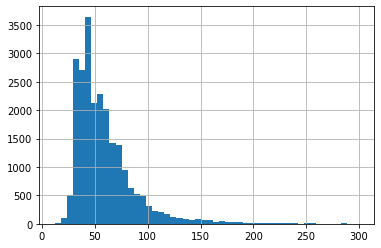

In [39]:
# изучим по очереди данные датасета
display(df['total_area'].describe())
df['total_area'].hist(bins=50, range=(12,300))
#после того как мы удалили максимальные значения общей площади, гистограмма стала более наглядной, квартиры с площадью более
#250 кв м встречаются редко

Средняя общая площадь продаваемых квартир 60кв, м , при этом основная масса это квартиры до 70 кв.м.

count    23525.000000
mean        33.784001
std         18.880967
min          5.000000
25%         19.000000
50%         30.000000
75%         42.000000
max        250.000000
Name: living_area, dtype: float64

<AxesSubplot:>

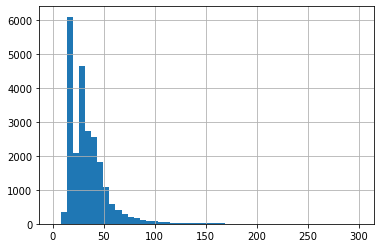

In [40]:
display(df['living_area'].describe())
df['living_area'].hist(bins=50, range=(2,300))


При исследовании данных о жилой площади мы удалили нереально низкие значения менее 5 кв.м
Нашли медианное соотношение жилой и общей площади оно сотавляет 0.57, и выяснили что большинство продаваемых квартир имее жилую площад от 19 до 42 кв.м.

count    23525.000000
mean        10.313390
std          5.399879
min          1.300000
25%          7.200000
50%          9.010000
75%         11.400000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

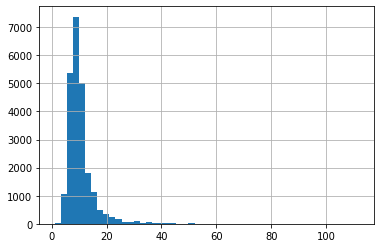

In [41]:
display(df['kitchen_area'].describe())
df['kitchen_area'].hist(bins=50, range=(1,112))

Средний расмер Петербуржской кухни 9 метров, что довольно неплохо, стандартная "хрущевская" кухня это 6 м. На кухнях Санкт-Петербурга намного уютнее

count    23525.000000
mean         6.250258
std          7.639616
min          0.430000
25%          3.400000
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price, dtype: float64

<AxesSubplot:>

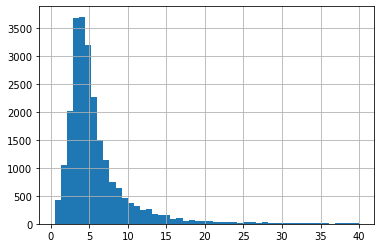

In [42]:
#для наглядности гистограммы переведем стоимость кварт в тыс. руб
#df.loc[df['last_price']] = df.loc[df['last_price']]/10000000
#df.head()
display(df['last_price'].describe())
df['last_price'].hist(bins=50, range = (0.5,40))


Средняя стоимость от медианной отличается, это влияние значений верхнего порога стоимости которые мы оставили в датасете - 45 млн р. 
Медианная стоимость составляет 4,65 млн что вполне соответсвует реальности


In [43]:
#удалим строки с нулевым значением количества комнат, их всего 196
#display(df.loc[df['rooms'] == 0].shape[0])
df = df.loc[df['rooms'] != 0]

count    23329.000000
mean         2.060311
std          0.986886
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

<AxesSubplot:>

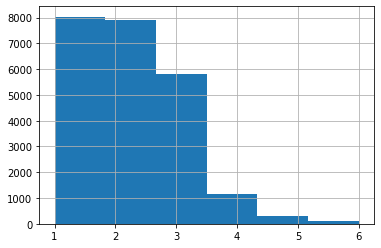

In [44]:
display(df['rooms'].describe())
df['rooms'].hist(bins=6)



Оснвная масса продаваемых квартир 1 - 2 комнатные, совсем редко встречаются квартиры с количеством комнат более 5

count    23329.000000
mean         2.693355
std          0.211706
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max          4.900000
Name: ceiling_height, dtype: float64

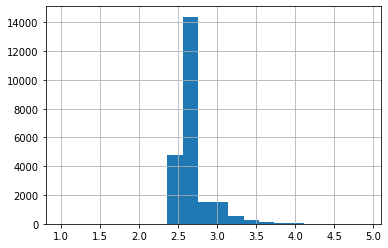

In [45]:
df['ceiling_height'].hist(bins=20)
df['ceiling_height'].describe()

средняя высота потолков 2.6 метра, показатель выше за счет высоких потолков в старых домах

count    23329.000000
mean         5.877749
std          4.869161
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

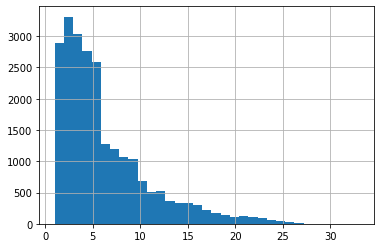

In [46]:
df['floor'].hist(bins=33)
df['floor'].describe()

Квартиры продаются как в старом жилом фонде так и вновостройках с высокой этажностью, но в большинстве своем продают на этажах от 1 до 6. второй по численности блок от 6 до 10.

<AxesSubplot:>

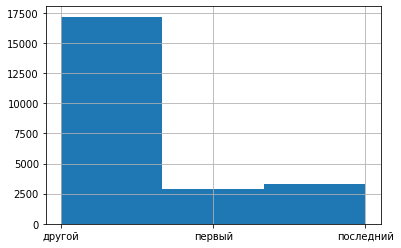

In [47]:
df['floor_type'].hist(bins=3)

Меньше всего объявлений о проаже квартир на первом этаже, на последнем нескуолько больше

count    23329.000000
mean        10.611685
std          6.590229
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

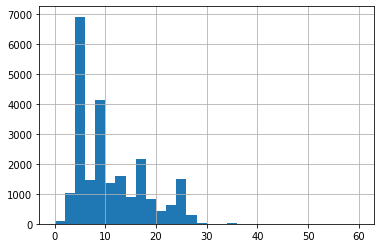

In [48]:
df['floors_total'].hist(bins=30)
df['floors_total'].describe()

В продаже преобладают дома от 5 до 10 этажей, при этом пятиэтажек подавляющее большинство. Интересно будет сравнить с этажностью домов в Москве.

count    17899.000000
mean     14256.039779
std       8616.704301
min        181.000000
25%       9360.000000
50%      13138.000000
75%      16313.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

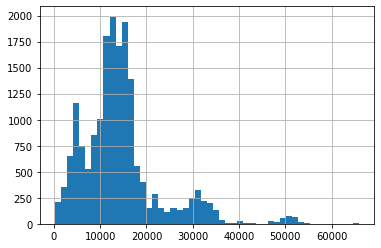

In [49]:
df['cityCenters_nearest'].hist(bins=50)
df['cityCenters_nearest'].describe()

Данные о расстоянии до центра есть только для квартир Санкт-Петербурга, основная масса продаваемых квартир находятся в радиусе от 10 до 18 километров от центра

count    17878.000000
mean     28853.481821
std      12660.488793
min          0.000000
25%      18557.000000
50%      26838.500000
75%      37364.000000
max      84869.000000
Name: airports_nearest, dtype: float64

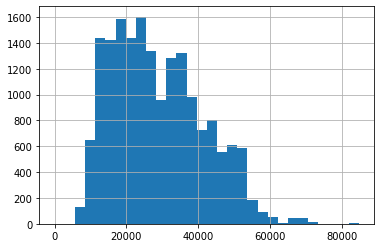

In [50]:
df['airports_nearest'].hist(bins=30)
df['airports_nearest'].describe()

Среднее расстояние до аэропорта 26 км. максимальное 84 км, Жаль что аэропорт только 1

count    7950.000000
mean      491.016226
std       343.403233
min         1.000000
25%       288.000000
50%       454.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

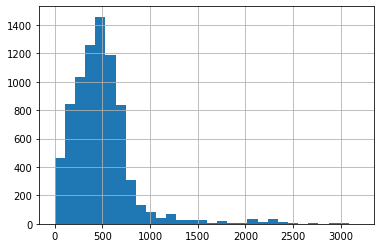

In [51]:
df['parks_nearest'].hist(bins=30)
df['parks_nearest'].describe()

Далеко ходить до парков не придется. В СПб парков много, и ежедневная прогулка в стреднем 454 метра будет полезна.

<AxesSubplot:>

count    23329.000000
mean         2.567191
std          1.790116
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: weekday, dtype: float64

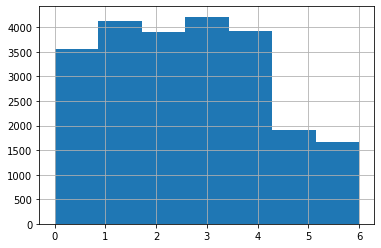

In [52]:
display(df['weekday'].hist(bins=7))
df['weekday'].describe()


С понедельника по пятницу объявления о продаже появлялись чаще. Выходные есть выходные

<AxesSubplot:>

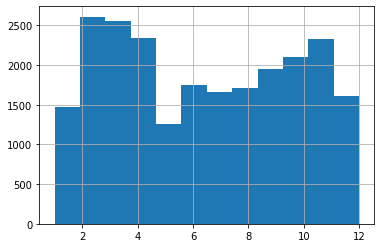

In [53]:
df['month_exposition'].hist(bins=12)

Меньше всего желающих продать квартиру мае, Больше всего в феврале

count    20198.000000
mean       180.929498
std        219.640038
min          1.000000
25%         45.000000
50%         96.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

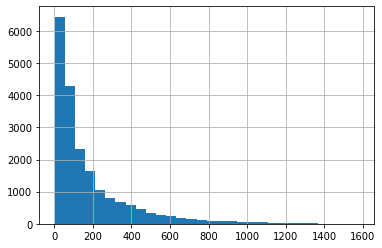

In [54]:
#Изучим как быстро продавались квартиры, для этого проанализируем стобец days_exposition
df['days_exposition'].hist(bins=30)
df['days_exposition'].describe()

*большинство всех квартир продается менее чем за 231 день, самая длительная продажа длилась 1580 дней, необычно длинными можно считать продажи свыше 800 дней, их не много, самая быстра продажа состоялась за 1 день.
медианная скорость продажи составлят 95 дней*


#### Зависимость цены

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

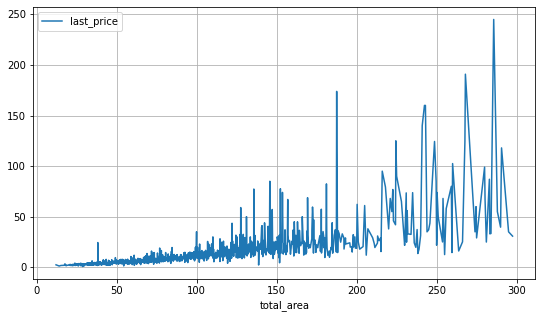

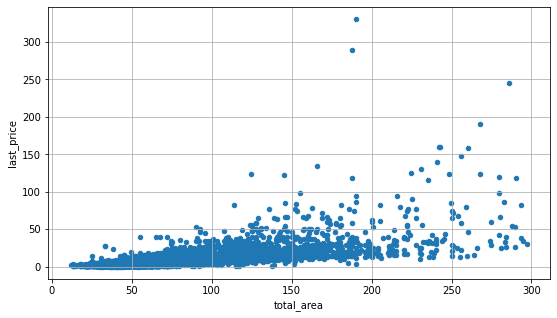

In [55]:
#для изучения зависмости цены от различных параметров квартиры будем использовать диаграмму рассеяния
(
    df.pivot_table(index='total_area', values ='last_price', aggfunc='median')
    .plot(grid=True, figsize=(9,5))
)
df.plot(kind='scatter', x ='total_area', y = 'last_price', grid=True, figsize=(9,5))

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

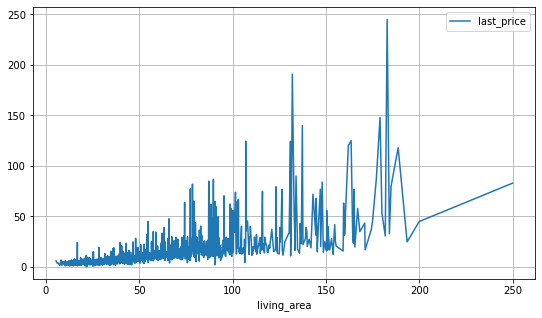

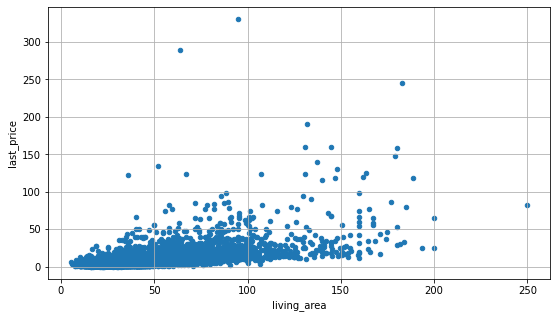

In [56]:
(
    df.pivot_table(index='living_area', values ='last_price', aggfunc='median')
    .plot(grid=True, figsize=(9,5))
)
df.plot(kind='scatter', x ='living_area', y = 'last_price', grid=True, figsize=(9,5))

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

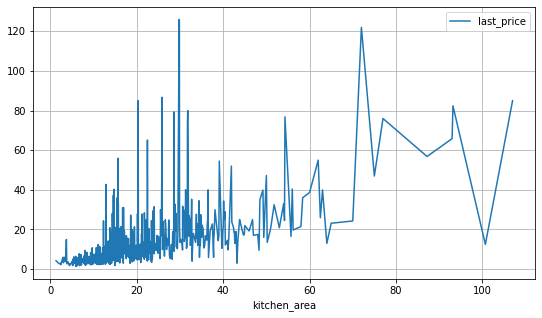

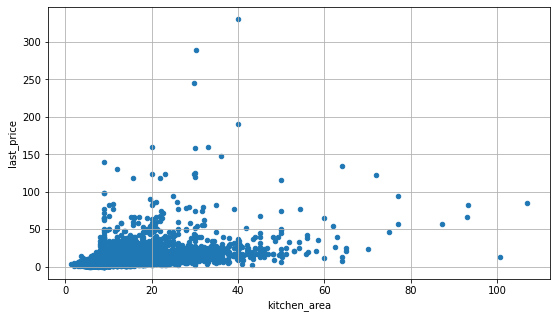

In [57]:
(
    df.pivot_table(index='kitchen_area', values ='last_price', aggfunc='median')
    .plot(grid=True, figsize=(9,5))
)
df.plot(kind='scatter', x ='kitchen_area', y = 'last_price', grid=True, figsize=(9,5))

*Если рассмотреть графики зависимости цены на квартру от площадей общей жилой или площади кухни, вилно что они примерно одинаковы, с увеличением размеров, увеличивается цена но в каждом диапазоне рамеров есть как пики высоких цен так и низких. Из этого можно слелать вывод что на цену влияет не только размер квартиры, ее жилой площади и кухни.

<AxesSubplot:xlabel='rooms'>

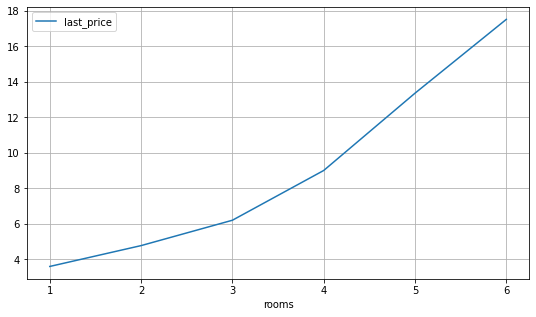

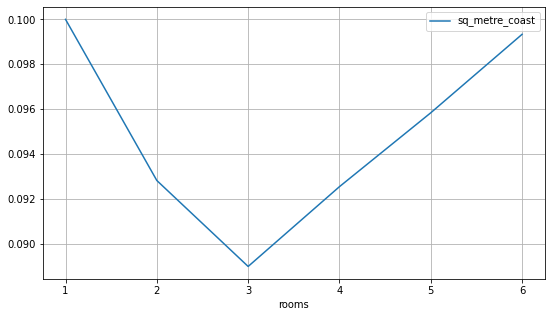

In [58]:
#зависимость медианной цены от колличества комнат
(
    df.pivot_table(index='rooms', values ='last_price', aggfunc='median')
    .plot(grid=True, figsize=(9,5))
)
(
    df.pivot_table(index='rooms', values ='sq_metre_coast', aggfunc='median')
    .plot(grid=True, figsize=(9,5))
)

*Зависимость медианной цены от количества комнат прослеживается четче. Чем больше комнат тем выше цена, это естесственно чем больше комнат тем больше жилая площадь.*

<AxesSubplot:xlabel='floor_type'>

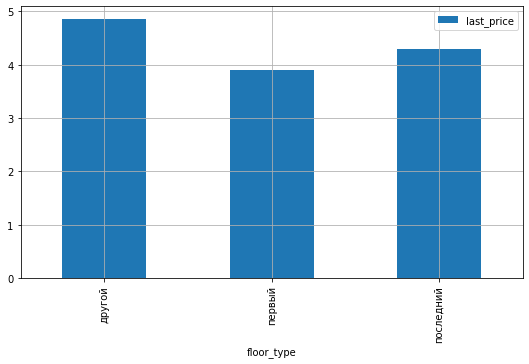

In [59]:
(
    df.pivot_table(index='floor_type', values ='last_price', aggfunc='median')
    .plot(kind = 'bar', grid=True, figsize=(9,5))
)
# медианная цена первого этаже самая низкая, последний ценится выше, но на квартиры на "других" этажах цены выше

<AxesSubplot:xlabel='year_exposition'>

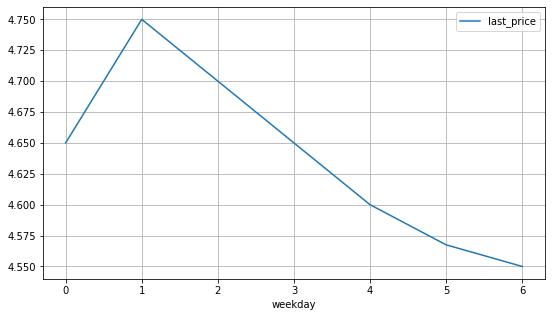

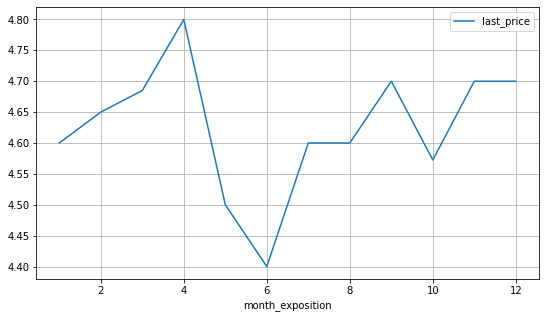

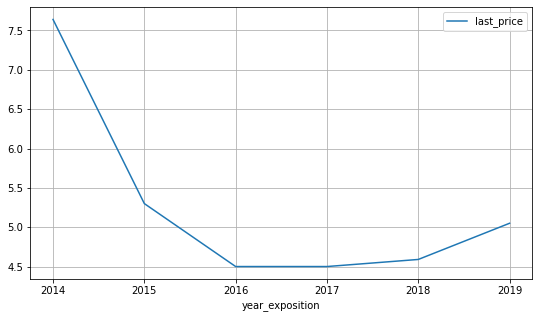

In [60]:
(
    df.pivot_table(index='weekday', values ='last_price', aggfunc='median')
    .plot(grid=True, figsize=(9,5))
)
(
    df.pivot_table(index='month_exposition', values ='last_price', aggfunc='median')
    .plot(grid=True, figsize=(9,5))
)
(
    df.pivot_table(index='year_exposition', values ='last_price', aggfunc='median')
    .plot(grid=True, figsize=(9,5))
)


*Из грфикоф выше можно сделать выводы:*
1. что самые высокие цены указывают при размещении объявления во вторник и среду.
2. стоимось квартир выше весной, и ниже летом. Прослеживается сезонность на рынке недвижимости
3. Медианная стоимость квартир с 214 по 217 снижалась, после 2017 года пошел рост



In [61]:
df['total_area'].corr(df['last_price'])

0.6749705507994619

In [62]:
df['kitchen_area'].corr(df['last_price'])

0.49082616088313713

In [63]:
df['rooms'].corr(df['last_price'])

0.37973141397197946

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра

In [64]:
df.head(1)
df_ten_max_ad = (
    df.pivot_table(index='locality_name', values='sq_metre_coast', aggfunc = ['count', 'mean'])
    )
df_ten_max_ad = df_ten_max_ad.rename(columns = {'sq_metre_coast':'', 'mean':'mean_sq_m_coast'})
df_ten_max_ad.sort_values(by = 'count', ascending = False).head(10)
#df.groupby(by = 'locality_name').count().sort_values(by ='total_images', ascending=False).head(10)
#.sort_values(by = 'sq_metre_coast', ascending = False)

,count,mean_sq_m_coast
,,
locality_name,,
Санкт-Петербург,15492,0.114279
поселок Мурино,529,0.085004
поселок Шушары,436,0.078406
Всеволожск,392,0.068618
Пушкин,367,0.103131
Колпино,337,0.075333
поселок Парголово,322,0.090448
Гатчина,307,0.068746


*Получили сводную таблицу с 10 населенными пунктами с самым большим количеством объявлений. Максимальная средняя цена квадратного метра в Санкт -Петербурге, минимальнгая - в Выборге*


Выделим квартиры в Санкт-Петербурге и вычислите среднюю цену каждого километра расстояния до центра. Опишите, как стоимость объектов зависит от расстояния до центра города."

inf

<AxesSubplot:xlabel='cityCenters_nearest_km', ylabel='last_price'>

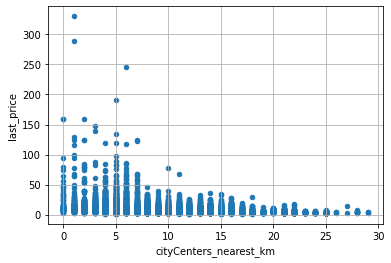

In [65]:
# Отфильтруем объявления по Санкт_петербургу и сохраним получившийся датасет в новую переменную
df_spb = df.loc[df['locality_name'] == 'Санкт-Петербург']
# добавим новый столбец с данными о средней стоимости расстояния от центра
df_spb['km_coast'] = df_spb['last_price']/df_spb['cityCenters_nearest_km']
#расчитаем среднюю стоимость
display(df_spb['km_coast'].mean())
#построим диаграмму рассеяния зависимости стоимости от расстояния от центра

df_spb.plot(kind ='scatter',  y='last_price', x='cityCenters_nearest_km', grid=True)

*По получившейся диаграмме делаем вывод что для Санкт - Петербурга цены на квартиры в радиусе 8 километров от центра примерно одинаковы, а в остальном - чем дальше от центра тем дешевле*

### Общий вывод

*Итак, была проведена большая работа, прежде всего для того чтобы сделать правильные выводы пришлось значительное время и силы потратить на исправление некорретных и заполнение отсутсвующих данных: были удалены строки с пропусками названий населенных пунктов; медианными значениями заполнены пропуски полощади кухни, жилой площади и высоты потолков
Были найдены и исправлены неявные дубликаты в названиях населенных пунктов
Изменены типы данных в столбцак на соответсвующие значениям и необходимые для правильного анализа
Изучены и пранализированны столбцы с числовыми значениями
Обязательно нужно отправить фидбэк расработчикам. 
На основе проведенного исследования сделаны следующие выводы:
- В среднем квартиры продаются за 3 месяца, что влияет на срок продажи можно выяснить проведя отдельное осследование.
- На стоимость квартыры в комплексе влияют много факторов от времени года размещения объявления до количество кв. метров. но основной критерий это естесственно общая площадь
- Пик сезона размещения объявлений - с февраля по апрель
- Цены на квартиры в радиусе 8 километров от центра примерно одинаковы, а в остальном - чем дальше от центра тем дешевле
- Самый дорогой кв метр в Санкт Петербурге, самый дешевый в Выборге, чем дальше от города тем дешевле
- Три самые дорогие дорогие квартиры - пентхаусы с большой площадью и вероятнее всего с хорошим видом из окон
- в 2014-2016 годах было резкое падение цен на квартиры, нужно было покупать в тот период, начиная с 2018 года - рост